In [39]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [40]:
data = pd.read_csv("abalone.csv")
data

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [41]:
# 데이터 전처리
data = data.drop(columns=["id"])  #id 열 삭제
data.columns  #나머지 열 확인

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [42]:
data.isnull().sum()  #결측치 확인


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [43]:
#엔코딩하기
#라이브러리 불러오기
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])  #Sex열 엔코딩하기

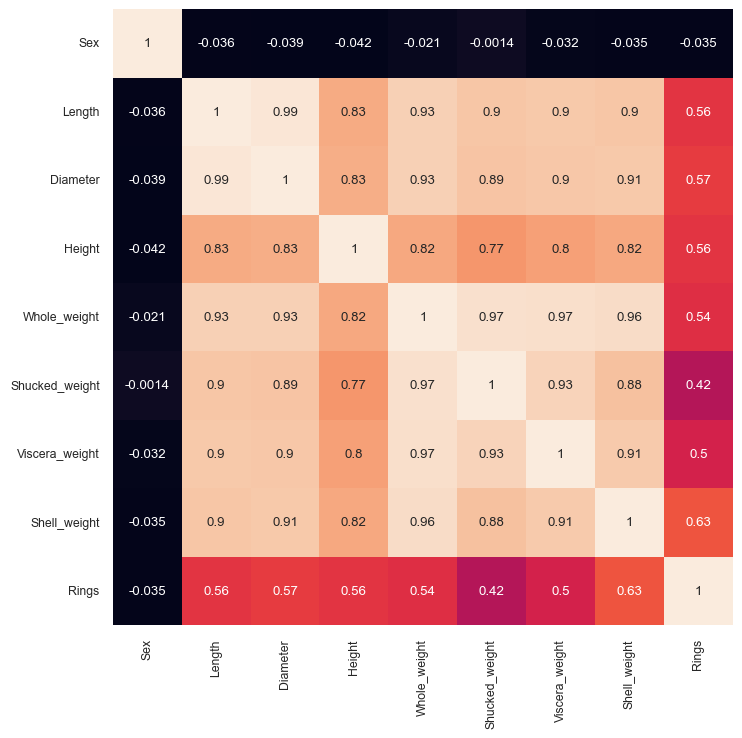

In [44]:
#상관관계 행렬
#0.3이상일 시 상관관계,
# 0.7이상일시 매우높음.
data_corr = data.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [45]:
#데이터 분리
X = data.drop(columns=['Rings'])  #입력값 분리
X.head() #입력값 분리 확인

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [46]:
y = data["Rings"]  #출력값 분리
y.head()  #출력값 분리 확인

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [47]:
scaler = StandardScaler()  #정규화를 위한 객체 생성
X = scaler.fit_transform(X)  #정규화

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #데이터 분할


In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #데이터 분할 확인

((3341, 8), (836, 8), (3341,), (836,))

Linear Regression MSE: 5.062537954095225


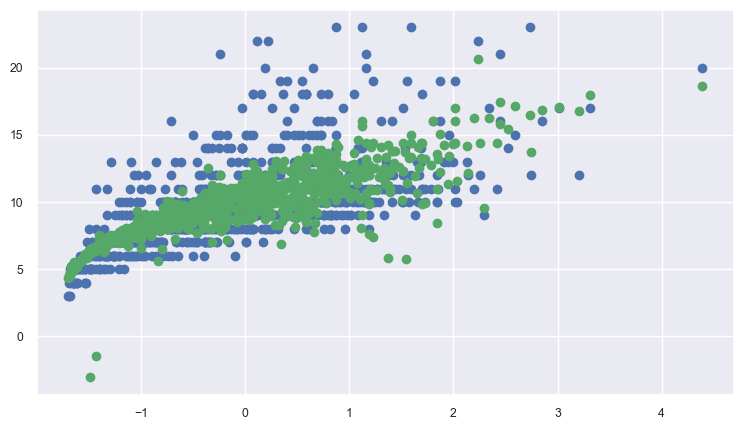

In [50]:
#1. LinearRegressor
model = LinearRegression()
model.fit(X_train, y_train)
lr_preds = model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(lr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], lr_preds, c="g", label='lr_preds')
plt.show()

DecisionTreeRegressor MSE: 10.223684210526315


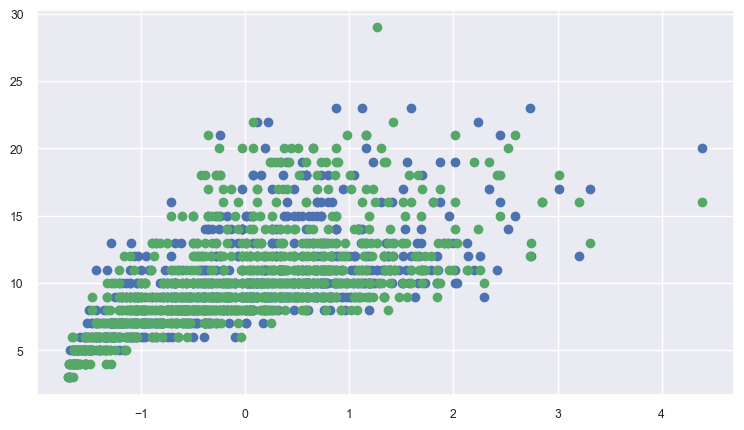

In [51]:
#2. DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dt_preds = model.predict(X_test)

print("DecisionTreeRegressor MSE:", mean_squared_error(dt_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], dt_preds, c="g", label='dy_preds')
plt.show()

RandomForestRegressor MSE: 4.98370956937799


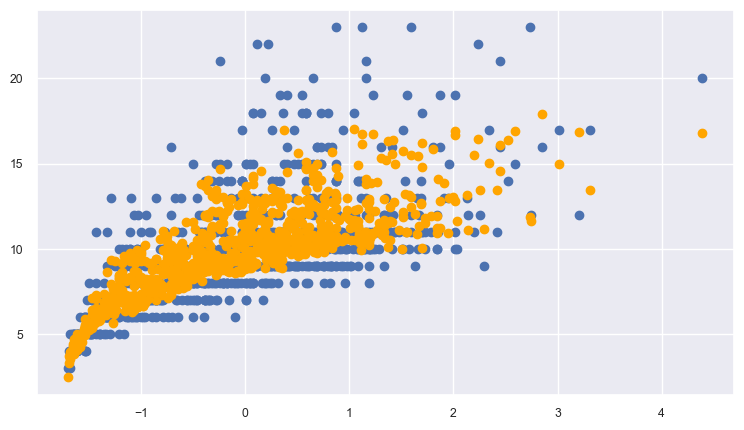

In [52]:
#3. RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print("RandomForestRegressor MSE:", mean_squared_error(rf_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], rf_preds, c="orange", label='rf_preds')
plt.show()

SVR MSE: 4.986037440191388


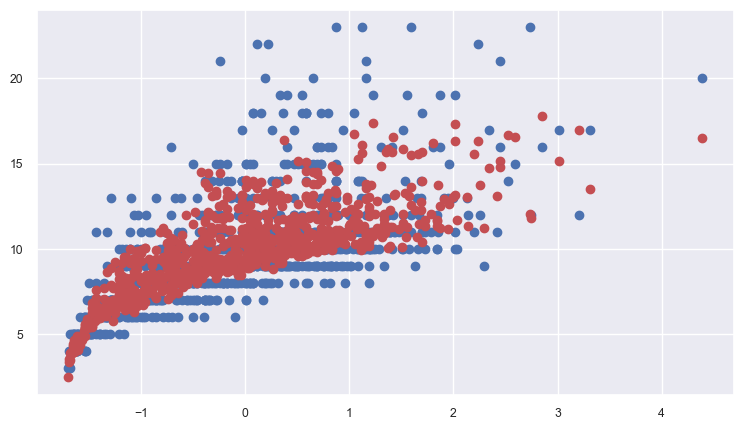

In [53]:
#4. SVR
model = RandomForestRegressor()
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)

print("SVR MSE:", mean_squared_error(svr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], svr_preds, c="r", label='svr_preds')
plt.show()